[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/4_ex_data_prep.ipynb) 

# BADS Exercise 4 on data preparation
This exercise revisits some of the concepts covered in [Tutorial 4 on data preparation](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb). That tutorial was rather comprehensive and provided a lot of materials and codes associated with typical tasks in the wide scope of data preparation. Therefore, the exercises will not go beyond [Tutorial 4](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb). Rather, we will consider a different data set and repeat some standard data prep. tasks for that data set.   

In [1]:
# Space to load some standard libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## 1 Loading the data 
The data set for this tutorial comes from the classic Book Credit Scoring and its Applications by Lyn C. Thomas, David B. Edelman, and Jonathan N. Crook. You can obtain the data, called *loan_data* from our [GitHub repository](https://github.com/Humboldt-WI/bads/tree/master/data). The data folder of the repository also provides a file *loan_data_dictionary*, which offers a brief description of the features in this data set. In a nutshell, the data represents yet another vanilla credit scoring task with a binary target variable, indicating whether bank customers repaid their debt or defaulted, and a few features characterizing credit applicants. Your first task is to load the data into a `Pandas DataFrame`.

In [2]:
# Load the data directly from GitHub

# Despite the fact that CSV stands for coma separated values, it also supports using
# other symbols to distinguish values from different columns. If you open `loan_data.csv` 
# in a text editor, you will see that values are in fact separated with a semi-colon.
# Therefore, we need to specify sep = ';' in `pd.read_csv()` to tell pandas which 
# symbol to use to separate one column from another. You can try importing the data 
# without specifying sep (default is ',') and check the summary to see why it does
# not work as expected. As always, be sure to check pandas documentation to learn
# more about different options when importing the data.
data_url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/loan_data.csv'
df       = pd.read_csv(data_url, sep = ';')

# Summary of the data
df

,YOB,nKIDS,nDEP,PHON,dINC_SP,EMPS_A,dINC_A,RES,dHVAL,dMBO,dOUTM,dOUTL,dOUTHP,dOUTCC,BAD
0,19.0,4.0,0.0,1,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,1,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,1,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,1,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,1,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52.0,4.0,1.0,1,0.0,V,37764.0,U,0.0,0.0,0.0,340.0,0.0,0.0,0.0
1221,56.0,3.0,0.0,1,1200.0,P,31500.0,O,6928.0,46464.0,784.0,256.0,0.0,0.0,1.0
1222,60.0,0.0,0.0,1,0.0,E,46800.0,O,11392.0,928.0,1144.0,680.0,0.0,108.0,0.0
1223,20.0,0.0,0.0,1,0.0,R,0.0,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0


By now, you have run through the process of getting a first idea about a new data set many times. You have seen examples in previous tutorials and have written your own codes in, e.g., the third exercise on predictive analytics. Nonetheless, draw once more on your experience and take a quick look into the data.  

In [3]:
# Check data dimensions 
print('Number of variables: {}'.format(df.shape[1])) 
print('Number of cases:     {}'.format(df.shape[0])) 

Number of variables: 15
Number of cases:     1225


In [4]:
# Examine top-7 rows of the data
df.head(7)

,YOB,nKIDS,nDEP,PHON,dINC_SP,EMPS_A,dINC_A,RES,dHVAL,dMBO,dOUTM,dOUTL,dOUTHP,dOUTCC,BAD
0,19.0,4.0,0.0,1,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,1,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,1,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,1,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,1,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42.0,2.0,0.0,1,10500.0,E,48000.0,O,43392.0,46464.0,1120.0,0.0,0.0,0.0,0.0
6,59.0,0.0,0.0,1,6500.0,B,30000.0,O,62464.0,56000.0,520.0,0.0,96.0,0.0,0.0


In [5]:
# Summary statistics for all features. We specify custom percentile values for 
# numeric features and set include = 'all' to display statistics for categorical 
# features as well.
df.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9],
            include     = 'all')

,YOB,nKIDS,nDEP,PHON,dINC_SP,EMPS_A,dINC_A,RES,dHVAL,dMBO,dOUTM,dOUTL,dOUTHP,dOUTCC,BAD
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225,1225.000000,1225,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,P,NaN,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,531,NaN,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,51.037551,0.623673,0.038367,0.903673,1990.084898,NaN,21244.211429,NaN,15693.857959,11225.691429,342.004898,121.926531,28.721633,39.595102,0.263673
std,15.301818,1.016013,0.219917,0.295159,4802.341425,NaN,15896.207986,NaN,20736.331833,18889.207107,427.993865,839.639588,119.324084,168.697101,0.440804
min,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,28.400000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,1.000000,0.000000,NaN,9000.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,1.000000,0.000000,NaN,19500.000000,NaN,0.000000,0.000000,256.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# Data overview is important to check the number of missing values and feature 
# types. The output suggests that there are no missing values and two features are
# stored as non-numeric objects.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YOB      1225 non-null   float64
 1   nKIDS    1225 non-null   float64
 2   nDEP     1225 non-null   float64
 3   PHON     1225 non-null   int64  
 4   dINC_SP  1225 non-null   float64
 5   EMPS_A   1225 non-null   object 
 6   dINC_A   1225 non-null   float64
 7   RES      1225 non-null   object 
 8   dHVAL    1225 non-null   float64
 9   dMBO     1225 non-null   float64
 10  dOUTM    1225 non-null   float64
 11  dOUTL    1225 non-null   float64
 12  dOUTHP   1225 non-null   float64
 13  dOUTCC   1225 non-null   float64
 14  BAD      1225 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 143.7+ KB


## 2 Data types
You can tell from the data dictionary that the loan data includes numeric and categorical variables. Draw on the examples from [Tutorial 4](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb) and make sure that all numeric features are stored as `float32` and all categorical features are stored as categories in your DataFame. Also, ensure that the feature `PHON` is stored as a boolean. Finally pick a suitable data type for the target variable `BAD`.

In [7]:
# Convert PHON and target variable
#---
df.PHON = df.PHON.astype("bool")

# Also convert the target. We could also make it a boolean or use an integer data type. The latter is better
# if we plan to use the target variable values in calculations, for example, when computing model residuals.
# We use a small integer data type for demonstration but is also fine to simply use bool here
df.BAD = df.BAD.astype("uint8")

In [8]:
# Encode categories properly
#---

# According to the data dictionary, there are two categorical features: EMPS_A and RES.
# As we saw in the `df.info()` command, these two features are stored as objects. 
# We need to convert them to the category format using `astype()`

# We have only two features to work on and can specify these manually
cat_features = ['EMPS_A', 'RES']  
# Alternatively, we can use the function select_dtypes() to select features of a certain type
cat_features = df.select_dtypes("object").columns.values 


# Both of the above alternatives would give an array, which we can use to index our data frame.
# We can then alter the data frame using that index as follows
df[cat_features] = df[cat_features].astype('category')

# Verify the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   YOB      1225 non-null   float64 
 1   nKIDS    1225 non-null   float64 
 2   nDEP     1225 non-null   float64 
 3   PHON     1225 non-null   bool    
 4   dINC_SP  1225 non-null   float64 
 5   EMPS_A   1225 non-null   category
 6   dINC_A   1225 non-null   float64 
 7   RES      1225 non-null   category
 8   dHVAL    1225 non-null   float64 
 9   dMBO     1225 non-null   float64 
 10  dOUTM    1225 non-null   float64 
 11  dOUTL    1225 non-null   float64 
 12  dOUTHP   1225 non-null   float64 
 13  dOUTCC   1225 non-null   float64 
 14  BAD      1225 non-null   uint8   
dtypes: bool(1), category(2), float64(11), uint8(1)
memory usage: 110.8 KB


In [9]:
# Downcasting numerical features
#---

# There is nothing wrong with storing all numeric features as `float64`. However, 
# if memory usage becomes an issue (e.g., when working with much larger data sets), 
# we can make use of the column types to reduce memory consumption. For instance, 
# `float64` supports 15 digits of precision, whereas `float32` allows 6 digits 
# after the dot, which is often enough in practice. Furthermore, we can convert a
# float-encoded feature to `int64` or `int32` if we know that it always takes 
# integer values only. You can check this blog post for more tips on reducing the 
# memory usage with different data types:
# https://towardsdatascience.com/pandas-save-memory-with-these-simple-tricks-943841f8c32

# For start, we once again get us an index of the numerical features...
con_features = df.select_dtypes("float64").columns.values
df[con_features] = df[con_features].astype("float32")

# Verify the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   YOB      1225 non-null   float32 
 1   nKIDS    1225 non-null   float32 
 2   nDEP     1225 non-null   float32 
 3   PHON     1225 non-null   bool    
 4   dINC_SP  1225 non-null   float32 
 5   EMPS_A   1225 non-null   category
 6   dINC_A   1225 non-null   float32 
 7   RES      1225 non-null   category
 8   dHVAL    1225 non-null   float32 
 9   dMBO     1225 non-null   float32 
 10  dOUTM    1225 non-null   float32 
 11  dOUTL    1225 non-null   float32 
 12  dOUTHP   1225 non-null   float32 
 13  dOUTCC   1225 non-null   float32 
 14  BAD      1225 non-null   uint8   
dtypes: bool(1), category(2), float32(11), uint8(1)
memory usage: 58.1 KB


## EDA
### 3.1 Histogram
The data includes a feature dINC_A, which captures the income of a credit applicant. We would expect that this feature is related to our target variable, which is called BAD in the data set. 

Create a histogram plot of the income feature and examine its distribution.

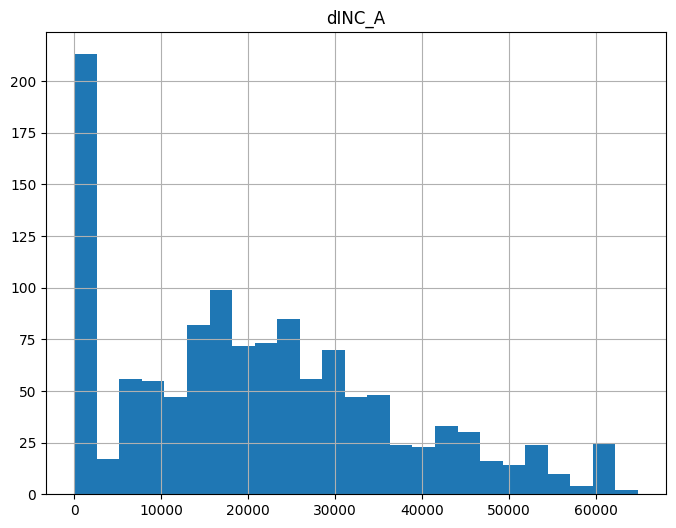

In [10]:
# Histogram of dINC_A 
df.hist(column = 'dINC_A',  # what feature to plot
        bins   = 25,        # number of bins
        figsize=(8,6));     # figure size 

# Histogram reveals that there is a large portion of applicants (more than 200) with 
# no income. The rest is distributed between 0 and about 65.000, with most values 
# lying between 5.000 and 35.000. We also see that the right tail of distribiton
# is rather long, indicating that the number of applicants earning at least X tends
# to gradually decrease when X goes above 25.000 and higher.

The distribution reveals some potentially important insights. However, the histogram alone does not suffice to check our intuition that income and credit risk are related. To that end, let's examine the income distribution across good and bad credit applications.

### 3.2 Analysis of the dependency between applicants' income and credit risk
We begin with a manual approach, which also allows us to revisit logical indexing in Python and Pandas. Calculate the average income of a credit applicant for good risks and for bad risks.

In [11]:
# Calculate the group-wise mean of dINC_A for good and bad risks using logical indexing
m0 = df.loc[df['BAD'] == 0]['dINC_A'].mean()
m1 = df.loc[df['BAD'] == 1]['dINC_A'].mean()
print('Mean income for GOOD risks: {:.4f}'.format(m0)) # {:.4f} implies that we  will print a float value rounded to 4 digits after the dot
print('Mean income for BAD risks:  {:.4f}'.format(m1))

Mean income for GOOD risks: 23008.6426
Mean income for BAD risks:  16316.9131


Remember that the Pandas function `groupby()` allows you to perform an analysis similar to your above calculation of the group-wise means. Replicate the previous calculation using `groupby()`.  

In [12]:
# Replicate previous results using groupby()
df.groupby('BAD')['dINC_A'].mean()

BAD
0    23008.642578
1    16316.913086
Name: dINC_A, dtype: float32

Next, we perform a graphical analysis. Depict the distribution of the income of customers with a good and bad risk, respectively, by means of a box-plot.

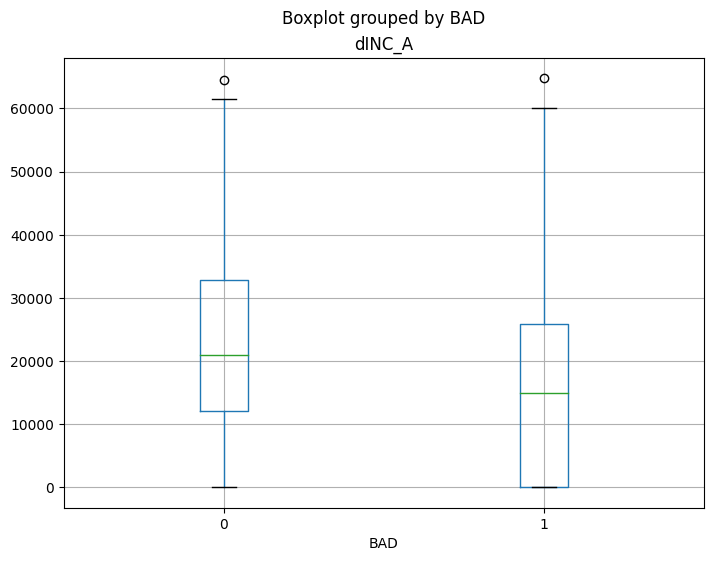

In [13]:
# Box plot
df.boxplot(column = 'dINC_A', # feature to plot  
           by     = 'BAD',    # feature to group by
           figsize= (8,6));

In [14]:
# Comparison of mean values and box plots confirms our intuition that BAD risks tend
# to have lower income than GOOD risks. Remember that boxes visualize the upper 
# and lower quartiles of a feature distribution. In our case, we observe that 
# half of the GOOD applicants have income between about 12.000 and 32.000, whereas
# half of the BAD risks have income between 0 and 26.000.

### 3.3 Statistical testing
Identify an appropriate statistical test to verify whether the observed income difference between good and bad applicants is statistically significant. Perform the test and display its results. Hint: A web-search similar to “statistical test difference in means python” will help.

In [15]:
# Statistical testing of mean differences in income (i.e., feature dINC_A)
#---

# One way to perform statistical testing of mean differences is a two-sided t-test.
# T-test checks the null hypothesis that two independent samples have identical average 
# (expected) values. In Python, t-test is implemented in several packages. The most 
# popular implementation is probably `ttest_ind()` that is part of the `scipy.stats` 
# package. Let's check the function documentation:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# Note that the two-sided t-test assumes equal variance within the samples by default.
# To run the correct version of the t-test (default or adjusted for unequal variances),
# we first need to check this assumption. One way to do that is to run a Levene test 
# for equal variances, which has the null hypothesis that variances within the samples
# are equal. If the Levene test rejects the null hypothesis, we can perform statistical 
# testing of mean differences using Welch’s t-test modification, which does not assume
# equal population variance, instead of the standrad t-test. This can be done simply 
# by specifying equal_var = False in the below `ttest_ind() function`.

# Let's run the Levene test first:
from scipy import stats
stats.levene(df.loc[df['BAD'] == 0]['dINC_A'], # good risks
             df.loc[df['BAD'] == 1]['dINC_A']) # bad risks

# The `levene()` function returns the test statistic and its p-value. If you need 
# to refresh you memory on p-values, you can check out this post:
# https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8A 

# In our case, Levene test does not reject the null hypothesis that variances are equal.
# This means that we can perform a standard two-sided t-test.

LeveneResult(statistic=0.034214288195485554, pvalue=0.8532824134210151)

In [16]:
# Let's now perform the t-test
stats.ttest_ind(df.loc[df['BAD'] == 0]['dINC_A'], 
                df.loc[df['BAD'] == 1]['dINC_A'], 
                equal_var  = True)               

# A very small p-value of the t-test suggests that we can reject the null hypothesis 
# at a reasonable level of signicance. This result indicates that the difference 
# in incomes between GOOD and BAD applicants is indeed statistically significant.

Ttest_indResult(statistic=6.6040866243773175, pvalue=5.950120052144809e-11)

### 3.4 Categorical variables
The data set comprises three categorical features. The feature PHON is binary and will not cause any issues. The features EMPS_A and RES are more interesting. Remember to check the data dictionary to understand what information the features encode. 

In the lecture, we explained that categorical features are typically encoded using dummy variables prior to applying an analytical model. Python supports dummy coding in several ways.  Pandas offers a function `get_dummies()` and sklearn offer a class `OneHotEncoder()`. The Pandas approach is maybe a bit easier to use. The more prevalent approach in practice is to rely on sklearn. 

Check the documentation of one or both of the above functions. Then create dummy variables for the feature RES and add them to your DataFrame.   

In [17]:
# Option 1: dummy coding of RES using `get_dummies()`
# Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

df_with_dummies = pd.get_dummies(df, columns = ['RES'])
print(df_with_dummies.shape)
df_with_dummies.head()

(1225, 19)


,YOB,nKIDS,nDEP,PHON,dINC_SP,EMPS_A,dINC_A,dHVAL,dMBO,dOUTM,dOUTL,dOUTHP,dOUTCC,BAD,RES_F,RES_N,RES_O,RES_P,RES_U
0,19.0,4.0,0.0,True,0.0,R,0.0,14464.0,4.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0
1,41.0,2.0,0.0,True,0.0,P,36000.0,0.0,0.0,280.0,664.0,0.0,80.0,0,0,0,1,0,0
2,66.0,0.0,0.0,True,0.0,N,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
3,51.0,2.0,0.0,True,0.0,P,464.0,24928.0,8464.0,584.0,320.0,0.0,60.0,0,0,0,1,0,0
4,65.0,0.0,0.0,True,0.0,P,15000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0


In [18]:
# Option 2: dummy coding of RES using `OneHotEncoder()`
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

# Applying sklearn encoders involves several steps:
# - initializing the encoder and specifying its properties
# - fitting the encoder to the data
# - transforming the data using the encoder
# - [if applied to specific columns] merging the result to the original data

# Initializing
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore', # treatment of unknown categories
                    sparse         = False)    # whether to return numpy array or sparse matrix

# Fitting encoder to a specific column. If we supply the whole dataframe, the 
# encoder will fit and then transform all columns. We only want to change one.
enc.fit(df[['RES']])

# Transforming the data / column
df_transformed = enc.transform(df[['RES']])

# Merging dummies to the data with `join()`. Note that the output of the sklearn 
# encoders is a numpy array or a sparce matrix. If necessary, you would need to 
# convert the array back to pandas dataframe. This is what we do below.
df_transformed = pd.DataFrame(df_transformed, 
                              columns = enc.get_feature_names_out()) # dummy names
df_with_dummies_2 = df.join(df_transformed)

# Deleting original variable
del df_with_dummies_2['RES']
print(df_with_dummies_2.shape)
df_with_dummies_2.head()

# As you can see, pandas `get_dummies()` approach is much simpler. However, learning
# the logic behind sklearn processors is very useful as there are many different 
# processors that can be applied to a data set using the same pipeline. 

(1225, 19)


,YOB,nKIDS,nDEP,PHON,dINC_SP,EMPS_A,dINC_A,dHVAL,dMBO,dOUTM,dOUTL,dOUTHP,dOUTCC,BAD,RES_F,RES_N,RES_O,RES_P,RES_U
0,19.0,4.0,0.0,True,0.0,R,0.0,14464.0,4.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0
1,41.0,2.0,0.0,True,0.0,P,36000.0,0.0,0.0,280.0,664.0,0.0,80.0,0,0.0,0.0,1.0,0.0,0.0
2,66.0,0.0,0.0,True,0.0,N,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0
3,51.0,2.0,0.0,True,0.0,P,464.0,24928.0,8464.0,584.0,320.0,0.0,60.0,0,0.0,0.0,1.0,0.0,0.0
4,65.0,0.0,0.0,True,0.0,P,15000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0


The feature EMPS_A has more distinct levels. Considering the previous task, it is obvious that dummy coding the feature will increase dimensionality substantially. To avoid this, it makes sense to **regroup** the category levels prior to dummy coding. 

In the lecture on data preparation, we argued that a pivot table helps to identify category levels that we can merge. Specifically, we were recommending merging category levels for which the odds (i.e., the ratio of goods to bads) is similar. The underlying idea was that if the good-to-bad odds for one category level $c$ are close to the odds of another category level $\tilde{c}$, then, from the point of predicting the target variable, it does not matter much whether we observe level $c$ or $\tilde{c}$ and hence, it is safe to merge the levels. 

Write some Python code to compute, for each category level $ c \in C$, with $C$ denoting the set of all possible levels, the good-to-bad odds $\frac{p(Y=0|X=c)}{p\left(Y=1|X=c\right)} $  in the feature `EMPS_A`. 

In [20]:
# Calculation of the odds for levels of EMPS_A

# Creating cross-tab of EMPS_A and BAD
res = pd.crosstab(df['EMPS_A'], df['BAD'])

# Computing odds 
res['G/B'] = res[0] / res[1]

# Displaying the output
res

BAD,0,1,G/B
EMPS_A,,,
B,22,8,2.750000
E,88,36,2.444444
M,17,6,2.833333
N,5,1,5.000000
P,413,118,3.500000
R,55,49,1.122449
T,86,37,2.324324
U,4,4,1.000000
V,187,44,4.250000


In [21]:
# Let's sort the results by the odds to obtain a clearer picture:
res = res.sort_values('G/B')
res

# As you can see, some values of EMPS_A have the same odds ratio (U and Z). Some
# other values also have a similar ratio (e.g., B and M).

BAD,0,1,G/B
EMPS_A,,,
U,4,4,1.000000
Z,4,4,1.000000
R,55,49,1.122449
W,21,16,1.312500
T,86,37,2.324324
E,88,36,2.444444
B,22,8,2.750000
M,17,6,2.833333
P,413,118,3.500000


Now merge some category levels based on your solution to the previous task.  

In [25]:
# Based on the previous results, we can merge some levels of EMPS_A with each other
# if they have similar good-to-bad odds. Clearly, this approach is heuristic.
# One possible solution could be to encode the employment status using four levels as follows:
# - level 1: ['U', 'Z', 'R', 'W']
# - level 2: ['T', 'E', 'B', 'M']
# - level 3: ['P', 'V']
# - level 4: ['N']

# You might prefer a different regrouping with fewer or more levels and/or different merge operations. That's ok. Feel free to 
# adjust the solution accordingly. 

# How to do the merging? Let's start by setting up a renaming dictionary
remap_dict = {
    'U': 'U+Z+R+W',
    'Z': 'U+Z+R+W',
    'R': 'U+Z+R+W',
    'W': 'U+Z+R+W',
    'T': 'T+E+B+M',
    'E': 'T+E+B+M',
    'B': 'T+E+B+M',
    'M': 'T+E+B+M',
    'P': 'P+V+N',
    'V': 'P+V+N',
    'N': 'P+V+N'}

# Now we can use `.map()` to merge category levels according to the dictionary
df['EMPS_A_merged'] = df['EMPS_A'].map(remap_dict).astype('category')

# Checking value counts
df['EMPS_A_merged'].value_counts()

P+V+N      768
T+E+B+M    300
U+Z+R+W    157
Name: EMPS_A_merged, dtype: int64

The advantage of merging category levels is that we need less dummy variables for encoding the feature. On the other hand, by reducing category levels, we run the risk of losing information. It would make sense to check that our previous merging of category levels did not hurt, e.g., was not too aggressive. Why aggressive? Well, imagine you merge all category levels into one level. This would render the feature useless. So there is a trade-off between having few levels, to not increase dimensionality, and not having too few levels, to sustain the information in the feature for distinguishing good and bad applicants. To find a healthy balance between these conflicting objectives, we need a measure that tells us whether a grouping is informative. It turns out that a well-known statistical test, namely the $\chi^2$ test, provides this functionality. 
- Run a quick web search to revisit the $\chi^2$ test and understand how it is useful for judging a grouping of EMPS_A in our context.
- Identify a way to calculate the $\chi^2$ test statistic in Python
- Calculate the test statistic for the original version of EMPS_A with 11 levels and the new version with less levels (i.e., solution to previous task)
- Interpret the results and conclude whether your encoding of EMPS_A is suitable

*Remark:* When merging categories, you should expect the $\chi^2$ test statistic to decrease unless the merged categories have exactly the same odds. When deciding how many (and which) categories to merge, we should balance two conflicting objectives and try reducing the number of categories such that we do not lose too much information. When fixing the number of category levels, you can use the $\chi^2$ test to compare competing encodings to select the one that preserves the most information. Play around with different ways to merge categories and try to select the one that achieves a good balance.

In [26]:
# Chi^2 testing of categorical features can be performed with `chi2_contingency()`
# from `scipy.stats`. The documentation is provided at:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

# Importing packages
from scipy.stats import chi2_contingency

# Testing the original EMPS_A encoding
# Note that `chi2_contingency()` return 4 values: test statistic, p-value, degrees 
# of freedom, expected frequencies. We only need the test statistic and can ignore
# the rest. Using _ as a name of the variable to save the output of a function implies
# that we ignore this output and do not store it in the memory.
ct_orig = pd.crosstab(df['BAD'], df['EMPS_A'])
stat_orig, pval_orig, dof_orig, _ = chi2_contingency(ct_orig)

# Testing the modified EMPS_A encoding
ct_merged = pd.crosstab(df['BAD'], df['EMPS_A_merged'])
stat_merged, pval_merged, dof_merged, _ = chi2_contingency(ct_merged)

# Comparing test results
print('Original data: Chi-square statistic with {:.0f} degrees of freedom is {:.2f} (p-value={:.6f})'.format(dof_orig, stat_orig, pval_orig))
print('Merged data: Chi-square statistic with {:.0f} degrees of freedom is {:.2f} (p-value={:.6f})'.format(dof_merged, stat_merged, pval_merged))

# You can take the following read for more details on Chi^2 tests:
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

Original data: Chi-square statistic with 10 degrees of freedom is 45.78 (p-value=0.000002)
Merged data: Chi-square statistic with 2 degrees of freedom is 44.30 (p-value=0.000000)


**Interpretation**
Let's discuss the test results. We know that the maximum statistic value (in our case, it is 45.78) is always observed with the original encoding. We could keep the same statistic value if we only merged U and Z, but that would only reduce the number of categories from 11 to 10. Merging more categories decreases the statistic but it matters which categories we merge to have a smaller reduction. More specifically, it costs less to merge categories that have similar odds.

In our example, we are able to reduce the number of categories from 11 to 4 at a very small reduction of the Chi^2 statistic from 45.78 to 44.30. This indicates that our solution preserves most of the information despite the fact that we dropped 7 categories. This appears to be a good balance between the cardinality and predictive power.

Now that we are done, recall that the very point of the re-grouping exercise was to reduce the number of category levels while not losing too much information. Fewer category levels, in turn, imply that we need less dummy variables to represnt the (regrouped) categorical variable in a regression model. Just to drive this point home, let's revisit the dummy coding step once more.

In [32]:
# Representation of the original feature using 10 dummy variables
print(pd.get_dummies(data=df["EMPS_A"], drop_first=True))

# Representation of the regrouped feature 
print(pd.get_dummies(data=df["EMPS_A_merged"], drop_first=True))

      E  M  N  P  R  T  U  V  W  Z
0     0  0  0  0  1  0  0  0  0  0
1     0  0  0  1  0  0  0  0  0  0
2     0  0  1  0  0  0  0  0  0  0
3     0  0  0  1  0  0  0  0  0  0
4     0  0  0  1  0  0  0  0  0  0
...  .. .. .. .. .. .. .. .. .. ..
1220  0  0  0  0  0  0  0  1  0  0
1221  0  0  0  1  0  0  0  0  0  0
1222  1  0  0  0  0  0  0  0  0  0
1223  0  0  0  0  1  0  0  0  0  0
1224  0  0  0  0  0  1  0  0  0  0

[1225 rows x 10 columns]
      T+E+B+M  U+Z+R+W
0           0        1
1           0        0
2           0        0
3           0        0
4           0        0
...       ...      ...
1220        0        0
1221        0        0
1222        1        0
1223        0        1
1224        1        0

[1225 rows x 2 columns]


# Well done. You did great in solving all the exercises!

**Optional**
By solving the previous task, you created a rather powerful mechanism to regroup categorical variables and judge the predictive power of the encoding prior to applying dummy coding. Write a function that wraps-up this functionality. In particular, your function should:
- receive a categorical variable as input
- check that the variable is actually a category
- determine the number of unique levels
- iteratively reduce the number of levels by:
  - calculating the odds of all current levels
  - merging the two levels whose odds is most similar
  - calculating the $\chi^2$ statistic for the current grouping and store its value
- plot the elbow curve for the $\chi^2$ statistic against the number of levels
- display the optimal encoding for each number of levels

*HINT:* recall the elbow curve showing relationship between the distance and the number of clusters that we plotted in [Tutorial 2](https://github.com/Humboldt-WI/bads/blob/master/tutorials/2_nb_descriptive_analytics.ipynb). Your function should output a similar graph.

Finally, check your implementation by applying the function to EMPS_A and interpreting the results.

Note that the described procedure mimics the logic behind the [CHAID tree](https://towardsdatascience.com/clearly-explained-top-2-types-of-decision-trees-chaid-cart-8695e441e73e), which is a tree-based supervised learning algorithm that finds feature splits based on the $\chi^2$ statistic. When pruning the CHAID tree, feature splits with the lowest value of the $\chi^2$ statistic are removed, which is similar to what we do when merging categories such that the drop in the $\chi^2$ statistic value is as small as possible. In the future demos, you will learn more about tree-based algorithms and implement a decision tree from scratch. Solving this exercise will help you to make a step towards a better understanding of the principles of these learning algorithms.

In [37]:
def optimize_grouping(cat_feature, target_feature):
    ''' Compares different encodings of a categorical variable using Chi^2 test. '''

    # Checking if feature is categorical
    if cat_feature.dtype != 'category':
        raise ValueError(
            f'Input feature is not categorical. Received feature of type: {cat_feature.dtype}')

    # Storing number and values of categories
    cats_num = [cat_feature.nunique()]
    cats = [cat_feature.cat.categories]

    # Performing chi2 test on the raw data
    ct = pd.crosstab(cat_feature, target_feature)
    stat, pv, _, _ = chi2_contingency(ct)
    chi_stats = [stat]
    pvals = [pv]

    # Iteratively grouping categories
    while cats_num[-1] > 1:

        # Computing odds ratio
        ct = pd.crosstab(cat_feature, target_feature)
        ct['odds'] = ct[0] / ct[1]

        # Finding min odds ratio difference using the function diff()
        # diff() computes the difference between adjacent rows in a data frame.
        # Prior sorting of the data frame ensures that we compute the difference between neighboring entries.
        ct = ct.sort_values('odds')
        ct['odds_diff'] = ct['odds'].diff()
        
        # Last step is to find the index of the row with minimum difference, which we achieve using Nump's where() function.
        min_idx = np.where(ct['odds_diff'] == ct['odds_diff'].min())[0][0]

        # Storing levels to merge
        levels_to_merge = ct[(min_idx - 1):(min_idx + 1)].index.values

        # Merging two categories with add_categories()
        # Label of the new category level; we arbitrarily select the plus sign as seperator
        new_level = '+'.join(levels_to_merge)
        cat_feature = cat_feature.cat.add_categories(new_level)
        for level in levels_to_merge:
            cat_feature[cat_feature == level] = new_level

        # We can now remove the two category levels that were just merged
        cat_feature = cat_feature.cat.remove_categories(levels_to_merge)

        # Storing number and values of categories after encoding
        cats_num.append(cat_feature.nunique())
        cats.append(cat_feature.cat.categories)

        # Performing chi2 test for merged category
        ct = pd.crosstab(cat_feature, target_feature)
        stat, pv, _, _ = chi2_contingency(ct)
        chi_stats.append(stat)
        pvals.append(pv)

    # Plotting elbow curve for the chi^2 statistics 
    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    ax1.set_title('$\chi^2$ Elbow Curve')
    ax1.plot(cats_num, chi_stats, 'darkblue')
    ax1.set_xlabel('Number of categories')
    ax1.set_ylabel('$\chi^2$ statistic', color='darkblue')
    
    # In the current context, the p-value of the Chi^2 test does not matter that much. However,
    # in case you are curious, we can add them to our chart in the following way, where the key
    # step is to add a second Y-axis for the p-values. This is crucial due to their small number
    # range. 
    
    ax2 = ax1.twinx()
    ax2.plot(cats_num, pvals, 'r-')
    ax2.set_ylim(0, 1e-7)
    ax2.set_ylabel('$\chi^2$ p-value', color='r')
    
    plt.show()
    
    # Printing encodings
    for i in range(len(cats)):
        print(f'- {cats_num[i]} categories: {cats[i].values}')
        

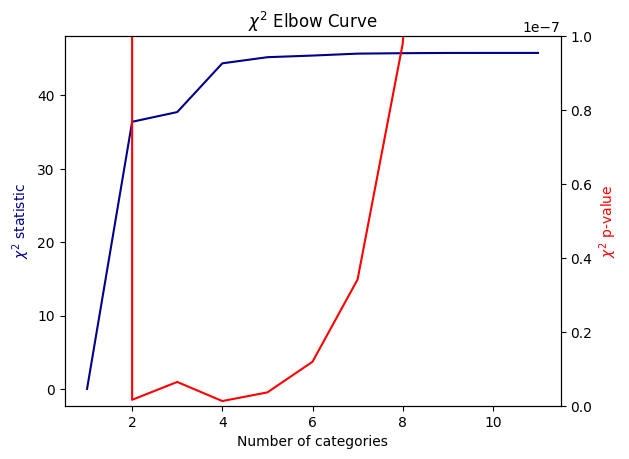

- 11 categories: ['B' 'E' 'M' 'N' 'P' 'R' 'T' 'U' 'V' 'W' 'Z']
- 10 categories: ['B' 'E' 'M' 'N' 'P' 'R' 'T' 'V' 'W' 'U+Z']
- 9 categories: ['E' 'N' 'P' 'R' 'T' 'V' 'W' 'U+Z' 'B+M']
- 8 categories: ['N' 'P' 'R' 'V' 'W' 'U+Z' 'B+M' 'T+E']
- 7 categories: ['N' 'P' 'V' 'W' 'B+M' 'T+E' 'U+Z+R']
- 6 categories: ['N' 'P' 'V' 'B+M' 'T+E' 'U+Z+R+W']
- 5 categories: ['N' 'P' 'V' 'U+Z+R+W' 'T+E+B+M']
- 4 categories: ['N' 'U+Z+R+W' 'T+E+B+M' 'P+V']
- 3 categories: ['N' 'U+Z+R+W' 'T+E+B+M+P+V']
- 2 categories: ['U+Z+R+W' 'T+E+B+M+P+V+N']
- 1 categories: ['U+Z+R+W+T+E+B+M+P+V+N']
[1.569201314588438e-06, 6.603441872275597e-07, 2.614847457609931e-07, 9.790718254640322e-08, 3.416199903440204e-08, 1.1897887961013847e-08, 3.6092001561580403e-09, 1.2614521370572492e-09, 6.430859883586554e-09, 1.6043469751478596e-09, 1.0]


In [38]:
# Let's apply our function and inspect the output
optimize_grouping(cat_feature = df['EMPS_A'], target_feature = df['BAD'])